In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [68]:
dataHosp = pd.read_csv('data/Hospitales_Normalizados.csv', index_col=0)

In [69]:
X = dataHosp.drop(['HOSPITALIZACION','ENF. CRONICA PULMONAR OBSTRUCTIVA','VOLUMEN PROSTATICO'], axis = 1)
y = dataHosp['HOSPITALIZACION']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [71]:
# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

In [72]:
# Entrenamos el modelo
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [73]:
feature_names = list(X.columns)
importances = clf.feature_importances_

# Imprime los nombres de los features junto con sus importancias
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

DIABETES: 0.052012568070576345
HOSPITALIZACIÓN ULTIMO MES: 0.0168059031555975
PSA: 0.3983184700105676
NUMERO DE MUESTRAS TOMADAS: 0.0022971255081749944
FIEBRE: 0.5305659332550836
ITU: 0.0


In [74]:
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1]
2
6
[0.05201257 0.0168059  0.39831847 0.00229713 0.53056593 0.        ]


In [75]:
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

In [76]:
#Para crear la matriz de confusión
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

#Para visualizar
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

#para obtener el valor de precisión, recall, F1-score y soporte para cada clase en un problema de clasificación
from sklearn.metrics import classification_report

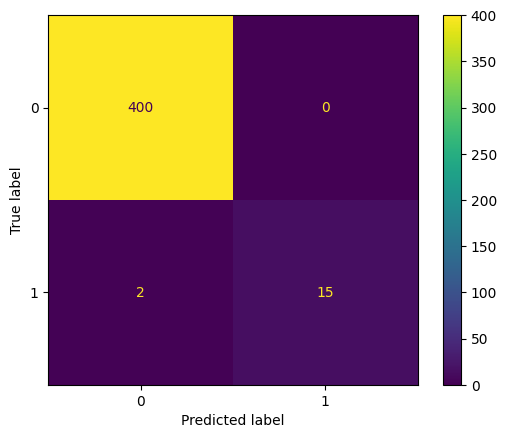

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      0.88      0.94        17

    accuracy                           1.00       417
   macro avg       1.00      0.94      0.97       417
weighted avg       1.00      1.00      1.00       417



In [77]:
cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

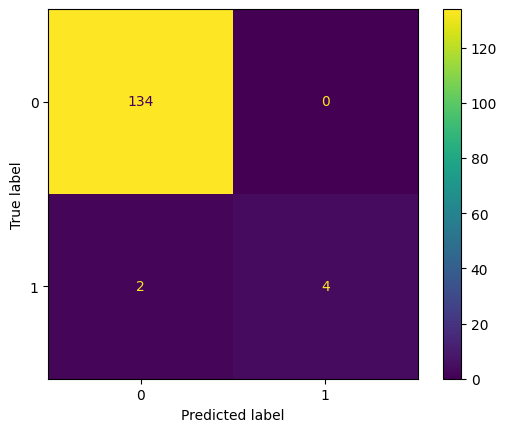

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.99      1.00      0.99       134
           1       1.00      0.67      0.80         6

    accuracy                           0.99       140
   macro avg       0.99      0.83      0.90       140
weighted avg       0.99      0.99      0.98       140



In [78]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

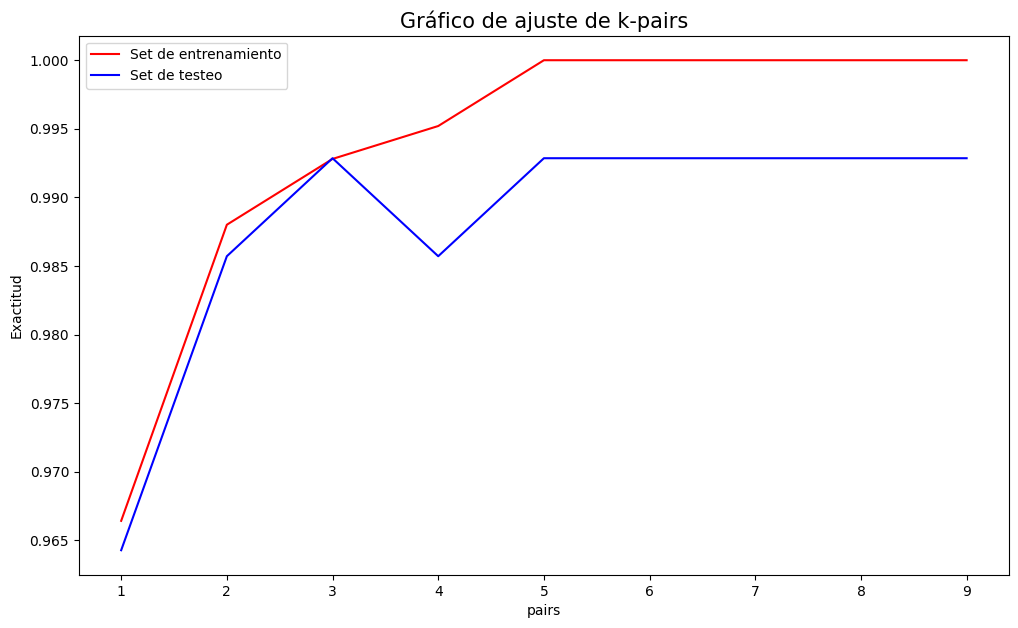

In [79]:
train_prec = []
test_prec = []
max_pairs = list(range(1, 10))

for n in max_pairs:
    clfx = DecisionTreeClassifier(max_depth=n, criterion='entropy')
    clfx.fit(X_train, y_train)
    train_prec.append(clfx.score(X_train, y_train))
    test_prec.append(clfx.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_pairs, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_pairs, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de k-pairs', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('pairs')
plt.show()    

In [ ]:
# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

# Entrenamos el modelo
clf.fit(X_train,y_train)